# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [47]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
# mouse_metadata_path = "data/Mouse_metadata.csv"
# study_results_path = "data/Study_results.csv"

mouse_metadata_path = 'C:\\Users\\movee\\Downloads\\Starter_Code (9)\\Starter_Code\\Pymaceuticals\\data\\Mouse_metadata.csv'
study_results_path = 'C:\\Users\\movee\\Downloads\\Starter_Code (9)\\Starter_Code\\Pymaceuticals\\data\\Study_results.csv'

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
combine_df = pd.merge(study_results, mouse_metadata, how="left", on="Mouse ID")

# Display the data table for preview
combine_df


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [48]:
import pandas as pd
print(pd.__version__)

2.2.2


In [49]:
# Checking the number of mice.
Number_mice = combine_df["Mouse ID"].nunique()
Number_mice

249

In [50]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
duplicate_mice = combine_df[combine_df.duplicated(subset=["Mouse ID", "Timepoint"], keep=False)]
duplicate_mice

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [51]:
duplicate_mice_ID = combine_df.loc[combine_df["Mouse ID"] == "g989"]
duplicate_mice_ID

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [52]:
# Optional: Get all the data for the duplicate mouse ID.


In [53]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = combine_df.loc[combine_df["Mouse ID"] != "g989"]
# clean_df=combine_df.drop_duplicates(subset=["Mouse ID"], keep ="first")
clean_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [54]:
len(clean_df["Mouse ID"].unique())

248

In [55]:
# Checking the number of mice in the clean DataFrame.
Number_unique_mice=clean_df["Mouse ID"].nunique()
Number_unique_mice

248

## Summary Statistics

In [56]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

summary_stats = clean_df.groupby('Drug Regimen').agg(
    mean_tumor_volume=('Tumor Volume (mm3)', 'mean'),
    median_tumor_volume=('Tumor Volume (mm3)', 'median'),
    variance_tumor_volume=('Tumor Volume (mm3)', 'var'),
    sd_tumor_volume=('Tumor Volume (mm3)', 'std'),
    sem_tumor_volume=('Tumor Volume (mm3)', 'sem')
)

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
grouped_data = clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)']

# mean, median, variance, standard deviation, and SEM of the tumor volume.
summary_stats = grouped_data.agg(['mean', 'median', 'var', 'std', 'sem'])

summary_stats.columns = ['Mean Tumor Volume', 'Median Tumor Volume', 'Variance Tumor Volume', 'Std. Deviation Tumor Volume', 'SEM Tumor Volume']
# Assemble the resulting series into a single summary DataFrame.

summary_df = pd.DataFrame(summary_stats)


In [57]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

summary_stats = clean_df.groupby("Drug Regimen").agg({'Tumor Volume (mm3)': ['mean', 'median', 'var', 'std', 'sem']})
summary_stats

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

In [58]:
means = clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()
medians = clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()
variances = clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()
sds = clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()
sems = clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()
summary_table = pd.DataFrame({"Mean Tumor Volume":means,
                              "Median Tumor Volume":medians,
                              "Tumor Volume Variance":variances,
                              "Tumor Volume Std. Dev.":sds,
                              "Tumor Volume Std. Err.":sems}) 
summary_table

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

In [59]:
drug_regimen_counts = clean_df['Drug Regimen'].value_counts()

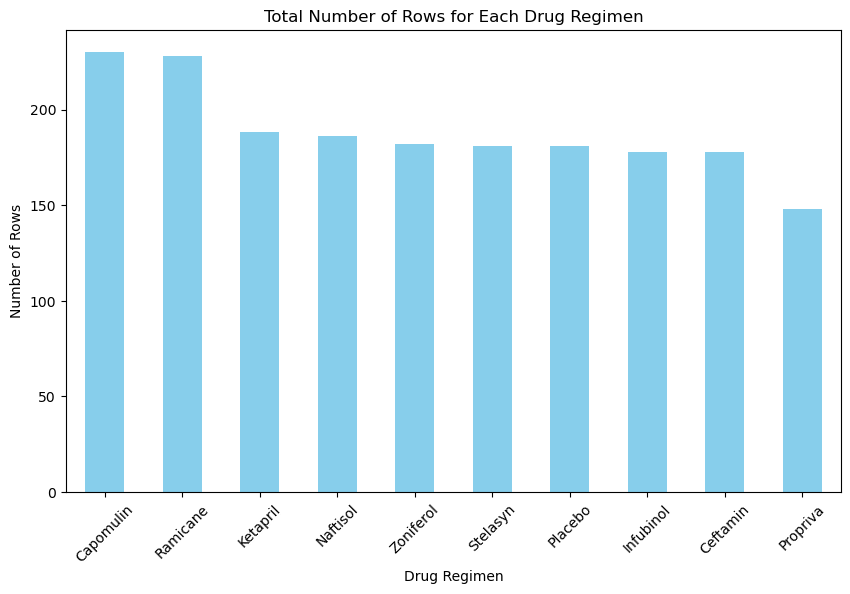

In [60]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
drug_regimen_counts.plot(kind='bar', color='skyblue', figsize=(10, 6))
plt.title('Total Number of Rows for Each Drug Regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Rows')
plt.xticks(rotation=45)
plt.show()


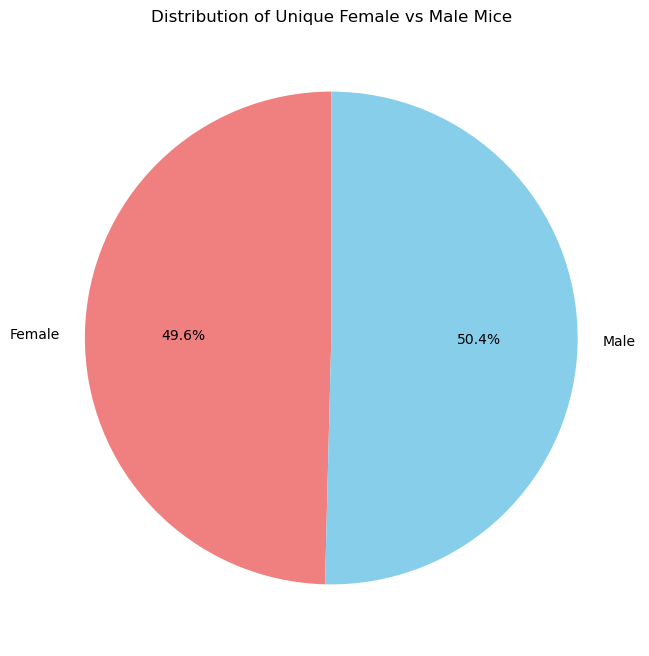

In [67]:
gender_counts = clean_df.drop_duplicates(subset=['Mouse ID', 'Sex'])[['Mouse ID', 'Sex']].groupby("Sex").size()

# Get the unique mice with their gender
gender_counts.plot(kind='pie', colors=['lightcoral', 'skyblue'], autopct='%1.1f%%', startangle=90, figsize=(8, 8))
plt.title('Distribution of Unique Female vs Male Mice')
plt.ylabel('')
plt.show()

# Make the pie chart


['Female', 'Male'] [123, 125]


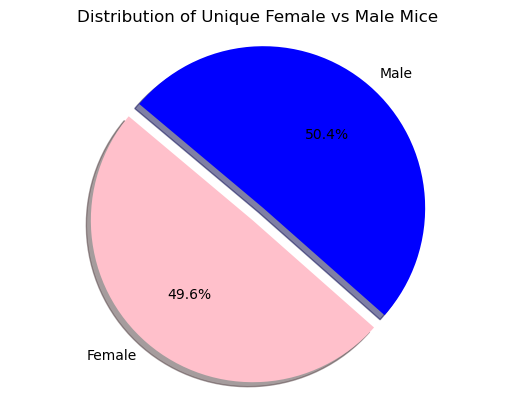

In [68]:
# Generate a pie chart, using pyplot, showing # the distribution of unique female versus male mice used in the study
#

unique_mice = clean_df.drop_duplicates(subset=['Mouse ID', 'Sex'])[['Mouse ID', 'Sex']].groupby("Sex").size()
unique_mice

# # Get the unique mice with their gender
# # male_count = sum(1 for mouse in unique_mice if mouse[1] == "Male")
# female_count = sum(1 for mouse in unique_mice if mouse[1] == "Female")
labels = list( unique_mice.index)
sizes = list(unique_mice.values)
print(labels, sizes)

# # unique_mice = clean_df.groupby(['Mouse ID', 'Sex']).size().reset_index(name='Count')
# # unique_mice = unique_mice[['Mouse ID', 'Sex']]
# # print(unique_mice)
# print(male_count)
# print(female_count)

# # Make the pie chart
# labels = ['Male', 'Female']
# sizes = [male_count, female_count]
colors = ['pink', 'blue']
explode = (0, 0.1)  # explode the female slice


plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')

plt.title("Distribution of Unique Female vs Male Mice")

plt.show()

## Quartiles, Outliers and Boxplots

In [63]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:

# Capomulin, Ramicane, Infubinol, and Ceftamin
selected_regimens = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
filtered_data = clean_df[clean_df['Drug Regimen'].isin(selected_regimens)]

final_tumor_volumes = filtered_data.groupby('Mouse ID')['Timepoint'].max().reset_index()
final_tumor_volumes = final_tumor_volumes.merge(clean_df, on=['Mouse ID', 'Timepoint'], how='left')[['Mouse ID', 'Drug Regimen', 'Tumor Volume (mm3)']]

print(final_tumor_volumes)



# max_timepoints = df.groupby('Mouse ID')['Timepoint'].max().reset_index()
max_timepoints = clean_df.groupby('Mouse ID')['Timepoint'].max().reset_index()

# Start by getting the last (greatest) timepoint for each mouse
max_timepoint = clean_df.groupby('Mouse ID')['Timepoint'].max()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
merged_df = pd.merge(clean_df, max_timepoints, on=['Mouse ID', 'Timepoint'], how='left')


   Mouse ID Drug Regimen  Tumor Volume (mm3)
0      a203    Infubinol           67.973419
1      a251    Infubinol           65.525743
2      a275     Ceftamin           62.999356
3      a411     Ramicane           38.407618
4      a444     Ramicane           43.047543
..      ...          ...                 ...
95     y769     Ceftamin           68.594745
96     y793    Capomulin           31.896238
97     y865     Ceftamin           64.729837
98     z578     Ramicane           30.638696
99     z581    Infubinol           62.754451

[100 rows x 3 columns]


In [64]:
clean_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [65]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']


# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers.
for treatment in treatments:

    # Locate the rows which contain mice on each drug and get the tumor volumes
    clean_df[clean_df['Drug Regimen']==treatment]['Tumor Volume (mm3)']

    # add subset - ***********save into variable to be able to append


    # Determine outliers using upper and lower bounds


In [1]:
import numpy as np

Q1 = np.percentile(tumor_vol_data, 25)
Q3 = np.percentile(tumor_vol_data, 75)

IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = [value for value in tumor_vol_data if value < lower_bound or value > upper_bound]

print(f"Lower Bound: {lower_bound}")
print(f"Upper Bound: {upper_bound}")
print(f"Potential Outliers: {outliers}")

NameError: name 'tumor_vol_data' is not defined

In [18]:
# Generate a box plot that shows the distribution of the tumor volume for each treatment group.


## Line and Scatter Plots

In [19]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin


In [20]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen


## Correlation and Regression

In [21]:
# Calculate the correlation coefficient and a linear regression model
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
